# 📚 第8天 - 机器学习算法入门

## 🎯 学习目标
- 理解机器学习的基本概念
- 掌握线性回归的原理和实现
- 学会使用scikit-learn进行机器学习
- 完成第一个完整的机器学习项目

## 📖 学习内容
1. **机器学习基础概念**
2. **线性回归原理**
3. **最小二乘法**
4. **scikit-learn基础**
5. **实际项目案例**

---

## 🔍 第1部分：机器学习基础概念

### 什么是机器学习？
机器学习是一种人工智能(AI)的子领域，它使计算机能够在没有明确编程的情况下学习。

### 机器学习的类型
- **监督学习**：有标签的数据 (回归、分类)
- **无监督学习**：无标签的数据 (聚类、降维)
- **强化学习**：通过奖励学习

### 机器学习的基本流程
1. 数据收集
2. 数据预处理
3. 特征工程
4. 模型选择
5. 模型训练
6. 模型评估
7. 模型部署

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

# 设置图形样式
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 机器学习环境准备完成！")
print("导入的库：numpy, pandas, matplotlib, seaborn, sklearn")

📚 机器学习环境准备完成！
导入的库：numpy, pandas, matplotlib, seaborn, sklearn


## 📈 第2部分：线性回归原理

### 什么是线性回归？
线性回归是一种建模方法，用于建立因变量与自变量之间的线性关系。

### 数学表达式
对于简单线性回归：
$$y = \beta_0 + \beta_1 x + \epsilon$$

对于多元线性回归：
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

### 目标函数
最小化均方误差（MSE）：
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

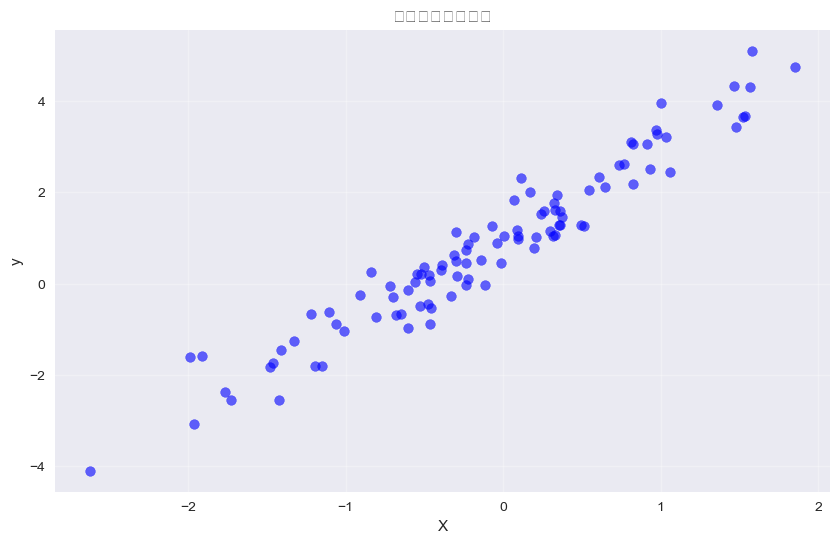

数据点数量: 100
X的形状: (100, 1)
y的形状: (100,)

线性回归结果：
截距 (β₀): 1.0073
斜率 (β₁): 1.9293
均方误差 (MSE): 0.2182
R² 分数: 0.9132


In [2]:
# 创建一个简单的线性回归示例
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 1)
y = 2 * X.flatten() + 1 + 0.5 * np.random.randn(n_samples)

# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('线性回归示例数据')
plt.grid(True, alpha=0.3)
plt.show()

print(f"数据点数量: {len(X)}")
print(f"X的形状: {X.shape}")
print(f"y的形状: {y.shape}")

# 使用scikit-learn进行线性回归
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建和训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n线性回归结果：")
print(f"截距 (β₀): {model.intercept_:.4f}")
print(f"斜率 (β₁): {model.coef_[0]:.4f}")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"R² 分数: {r2:.4f}")

## 🏠 第3部分：实际项目案例 - 房价预测

### 项目背景
使用房屋的各种特征（面积、房间数、地理位置等）来预测房价。

### 数据集特征
- 面积（平方米）
- 房间数
- 房龄
- 地理位置评分

### 项目目标
- 建立房价预测模型
- 评估模型性能
- 实现新房价预测

In [3]:
# 创建模拟的房价数据集
np.random.seed(42)
n_samples = 1000

# 特征生成
area = np.random.normal(100, 30, n_samples)  # 面积
rooms = np.random.randint(1, 6, n_samples)   # 房间数
age = np.random.randint(0, 50, n_samples)    # 房龄
location_score = np.random.uniform(1, 10, n_samples)  # 地理位置评分

# 价格生成（基于特征的线性组合加噪声）
price = (area * 500 + rooms * 10000 - age * 200 + location_score * 5000 + 
         np.random.normal(0, 5000, n_samples))

# 创建DataFrame
house_data = pd.DataFrame({
    'area': area,
    'rooms': rooms,
    'age': age,
    'location_score': location_score,
    'price': price
})

# 确保价格为正
house_data['price'] = np.maximum(house_data['price'], 10000)

print("🏠 房价数据集生成完成！")
print(f"数据集大小: {house_data.shape}")
print("\n前5行数据:")
print(house_data.head())
print("\n数据统计:")
print(house_data.describe())

# 特征工程和模型训练
features = ['area', 'rooms', 'age', 'location_score']
X = house_data[features]
y = house_data['price']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建和训练模型
house_model = LinearRegression()
house_model.fit(X_train, y_train)

# 预测
y_pred = house_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🏆 房价预测模型评估结果:")
print(f"均方误差 (MSE): {mse:,.2f}")
print(f"均方根误差 (RMSE): {rmse:,.2f}")
print(f"决定系数 (R²): {r2:.4f}")
print(f"平均绝对误差 (MAE): {np.mean(np.abs(y_test - y_pred)):,.2f}")

# 特征重要性
print("\n特征重要性 (系数):")
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': house_model.coef_,
    'abs_coefficient': np.abs(house_model.coef_)
})
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)
print(feature_importance)

print(f"\n截距: {house_model.intercept_:,.2f}")

🏠 房价数据集生成完成！
数据集大小: (1000, 5)

前5行数据:
         area  rooms  age  location_score          price
0  114.901425      4   42        5.356694  110357.175917
1   95.852071      1   18        7.727000   94452.993012
2  119.430656      3    4        5.264288  114960.779178
3  145.690896      5   10        1.520600  130872.841479
4   92.975399      3   11        9.620108  114143.073247

数据统计:
              area        rooms          age  location_score          price
count  1000.000000  1000.000000  1000.000000     1000.000000    1000.000000
mean    100.579962     3.045000    24.833000        5.490840  103211.522779
std      29.376478     1.424431    14.296206        2.605604   25330.653998
min       2.761980     1.000000     0.000000        1.000105   30701.420679
25%      80.572291     2.000000    12.000000        3.203771   84638.985762
50%     100.759018     3.000000    25.000000        5.508456  103089.847879
75%     119.438316     4.000000    37.000000        7.750448  120788.646300
max  

🏠 新房价格预测:
房子 1:
  面积: 120.0 平方米
  房间数: 3.0 个
  房龄: 5.0 年
  地理位置评分: 8.5
  预测价格: 131,555.41 元
----------------------------------------
房子 2:
  面积: 85.0 平方米
  房间数: 2.0 个
  房龄: 15.0 年
  地理位置评分: 6.0
  预测价格: 89,753.12 元
----------------------------------------
房子 3:
  面积: 150.0 平方米
  房间数: 4.0 个
  房龄: 2.0 年
  地理位置评分: 9.2
  预测价格: 160,436.35 元
----------------------------------------
房子 4:
  面积: 95.0 平方米
  房间数: 2.0 个
  房龄: 25.0 年
  地理位置评分: 5.5
  预测价格: 90,187.39 元
----------------------------------------
房子 5:
  面积: 200.0 平方米
  房间数: 5.0 个
  房龄: 1.0 年
  地理位置评分: 9.8
  预测价格: 198,349.40 元
----------------------------------------


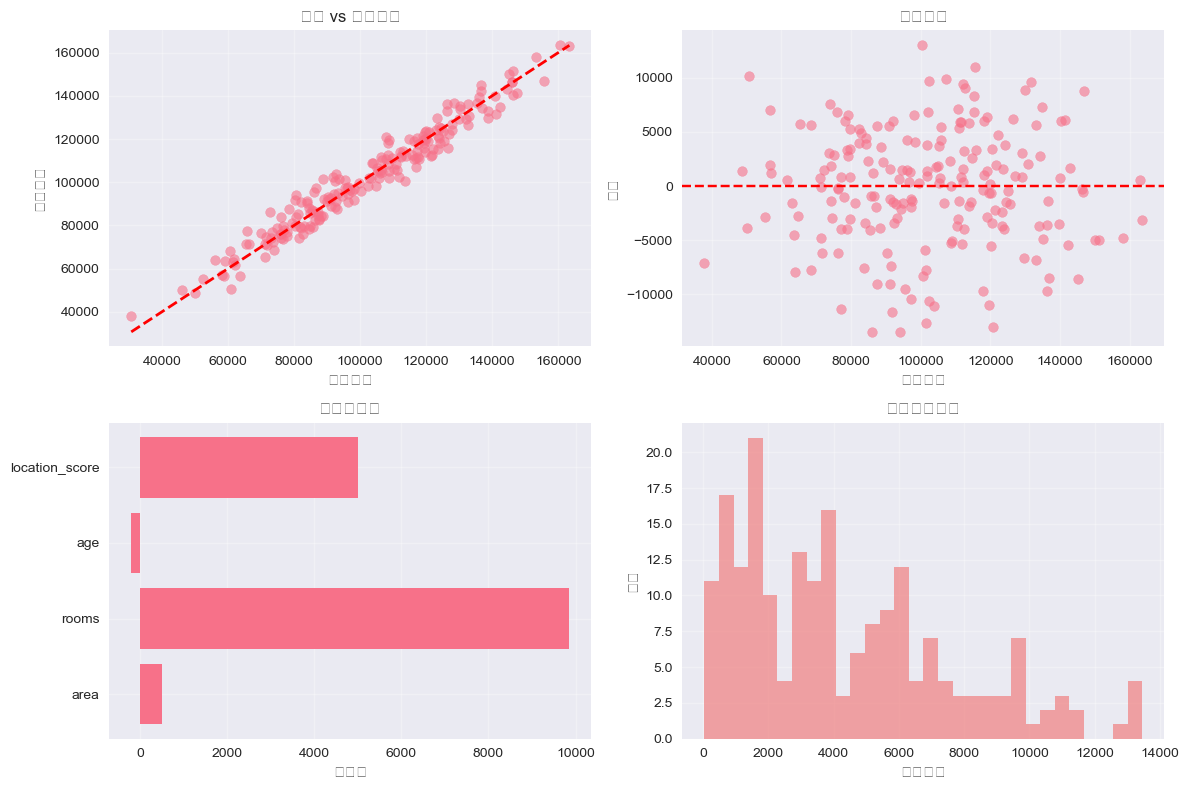


📚 学习总结:
1. 理解了机器学习的基本概念和流程
2. 掌握了线性回归的数学原理
3. 学会了使用scikit-learn进行机器学习
4. 完成了房价预测的完整项目
5. 了解了模型评估和优化的方法

🎯 下一步学习建议:
- 学习分类算法（逻辑回归、决策树）
- 深入理解特征工程的重要性
- 掌握模型评估和调优技巧
- 学习更高级的机器学习算法


In [4]:
# 新房价预测
new_houses = pd.DataFrame({
    'area': [120, 85, 150, 95, 200],
    'rooms': [3, 2, 4, 2, 5],
    'age': [5, 15, 2, 25, 1],
    'location_score': [8.5, 6.0, 9.2, 5.5, 9.8]
})

# 预测新房价格
predicted_prices = house_model.predict(new_houses)

# 显示预测结果
print("🏠 新房价格预测:")
print("=" * 80)
for i, (_, house) in enumerate(new_houses.iterrows()):
    print(f"房子 {i+1}:")
    print(f"  面积: {house['area']:.1f} 平方米")
    print(f"  房间数: {house['rooms']} 个")
    print(f"  房龄: {house['age']} 年")
    print(f"  地理位置评分: {house['location_score']:.1f}")
    print(f"  预测价格: {predicted_prices[i]:,.2f} 元")
    print("-" * 40)

# 可视化预测结果
plt.figure(figsize=(12, 8))

# 预测 vs 实际
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('实际价格')
plt.ylabel('预测价格')
plt.title('预测 vs 实际价格')
plt.grid(True, alpha=0.3)

# 残差分析
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('预测价格')
plt.ylabel('残差')
plt.title('残差分析')
plt.grid(True, alpha=0.3)

# 特征重要性
plt.subplot(2, 2, 3)
plt.barh(features, house_model.coef_)
plt.xlabel('系数值')
plt.title('特征重要性')
plt.grid(True, alpha=0.3)

# 预测误差分布
plt.subplot(2, 2, 4)
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=30, alpha=0.7, color='lightcoral')
plt.xlabel('绝对误差')
plt.ylabel('频数')
plt.title('预测误差分布')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📚 学习总结:")
print("1. 理解了机器学习的基本概念和流程")
print("2. 掌握了线性回归的数学原理")
print("3. 学会了使用scikit-learn进行机器学习")
print("4. 完成了房价预测的完整项目")
print("5. 了解了模型评估和优化的方法")
print("\n🎯 下一步学习建议:")
print("- 学习分类算法（逻辑回归、决策树）")
print("- 深入理解特征工程的重要性")
print("- 掌握模型评估和调优技巧")
print("- 学习更高级的机器学习算法")